...evaluating matrix... (0,0)
(1,1)
(2,2)
(3,3)
(4,4)
(5,5)
(6,6)
(7,7)
(8,8)
(9,9)
(10,10)
(11,11)
(12,12)
(13,13)
(14,14)
(15,15)
(16,16)
(17,17)
(18,18)
(19,19)
(20,20)
('XXX c', array([-1.27323954, -0.42441318, -0.25464791, -0.18189136, -0.14147047,
       -0.11574833, -0.09794065, -0.08488165, -0.07489533, -0.06701136,
       -0.06062908, -0.05535674, -0.05092795, -0.04715525, -0.04390291,
       -0.04107021, -0.03858086, -0.03637598, -0.03440946, -0.03264462,
       -0.03105194]))


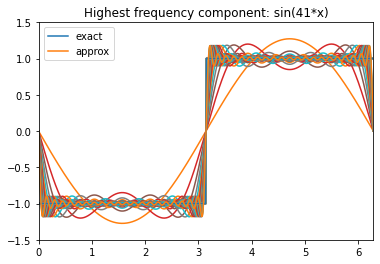

In [1]:
from approx1D import least_squares_numerical
import sympy as sym
from numpy import tanh, sin, pi, linspace
import matplotlib.pyplot as plt
import time, os

x = linspace(0, 2*pi, 1001)
#x = linspace(0, 2*pi, 3)
s = 20
s = 2000

def f(x):
    return tanh(s*(x-pi))

# Need psi(x) with a parameter i: use a class

"""
s= 2000 # not only 20

Start with sin((i+1)*x). Seems that all the odd i do not give
a contribution. Switch to 2*i+1.

Maybe: Run 2*(i+1)*x and see that the noise here increases. Compare
sin((i+1)*x) and sin((2*i+1)*x) in a movie. More or less Gibb's
phenomenon?

Introduce B=x/pi - 1.
Get strange results with 2*i+1, switch to i*x and get nice results,
show mathematically that the 2*i+1 functions are odd about
pi/2 and 3*pi/2.

Move the steep front away from pi, argue that all funcs are odd about
pi and cannot capture the new front.  Add cosines to the basis
(i%2==0: sin(i/2*x) else cos((i+1)*x)). Or maybe shifted sines?

If B(x) is chosen such that B(pi) != 0, do we get an approximation
problem then?
"""

def a(N):
    def psi(x, i):
        #return sin((i+1)*x)
        return sin((2*i+1)*x)
    #return sin((2*(i+1))*x)

    u, c = least_squares_numerical(f, psi, N, x,
                                   #integration_method='trapezoidal',
                                   integration_method='scipy',
                                   orthogonal_basis=True)
    os.system('rm -f *.png')
    u_sum = 0
    print(('XXX c', c))
    for i in range(N+1):
        u_sum = u_sum + c[i]*psi(x, i)
        plt.plot(x, f(x), '-', x, u_sum, '-')
        plt.legend(['exact', 'approx'])
        plt.title('Highest frequency component: sin(%d*x)' % (2*i+1))
        plt.axis([x[0], x[-1], -1.5, 1.5])
        plt.savefig('tmp_frame%04d.png' % i)
        time.sleep(0.3)
    cmd = 'avconv -r 2 -i tmp_frame%04d.png -vcodec libtheora movie.ogg'
    #os.system(cmd)

a(20)
#a(30)




